In [5]:
df = pd.read_csv("/Users/fatlumdili/ai_finance_project/data/train.csv")


In [6]:
import os
print(os.getcwd())



/Users/fatlumdili/ai_finance_project


MSE: 0.31243
MAE: 0.4779999999999999
R²: -0.30179166666666646


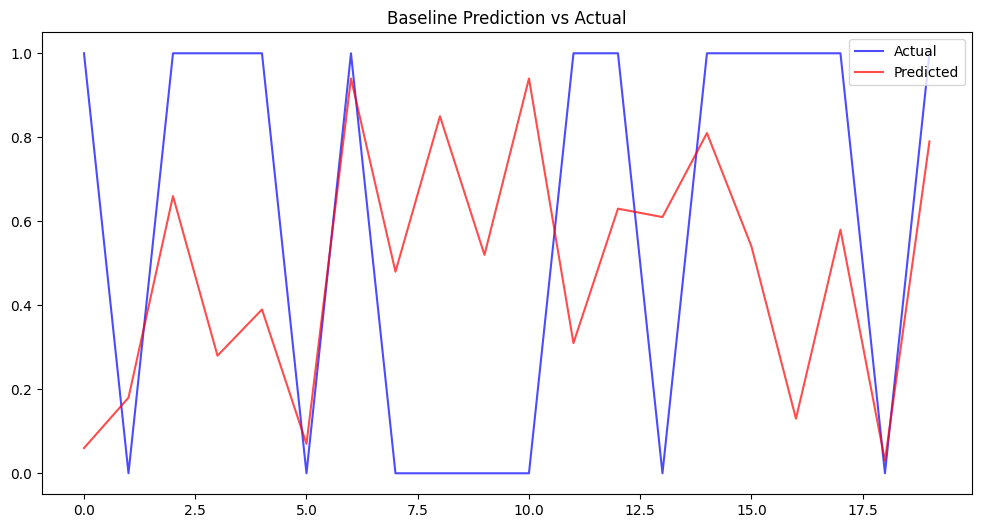

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ======================
# 1. Load & prepare data
# ======================
# Example: assume df has features in X_cols and target in y_col
X_cols = [c for c in df.columns if c != "target"]
y_col = "target"

X = df[X_cols].values
y = df[y_col].values

# Time-series split (no shuffling!)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# ======================
# 2. Scale data
# ======================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# ======================
# 3. Train baseline model
# ======================
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

# ======================
# 4. Evaluation
# ======================
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# ======================
# 5. Plot actual vs predicted
# ======================
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted", color="red", alpha=0.7)
plt.legend()
plt.title("Baseline Prediction vs Actual")
plt.show()


In [11]:
import pandas as pd

df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')
print(df.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


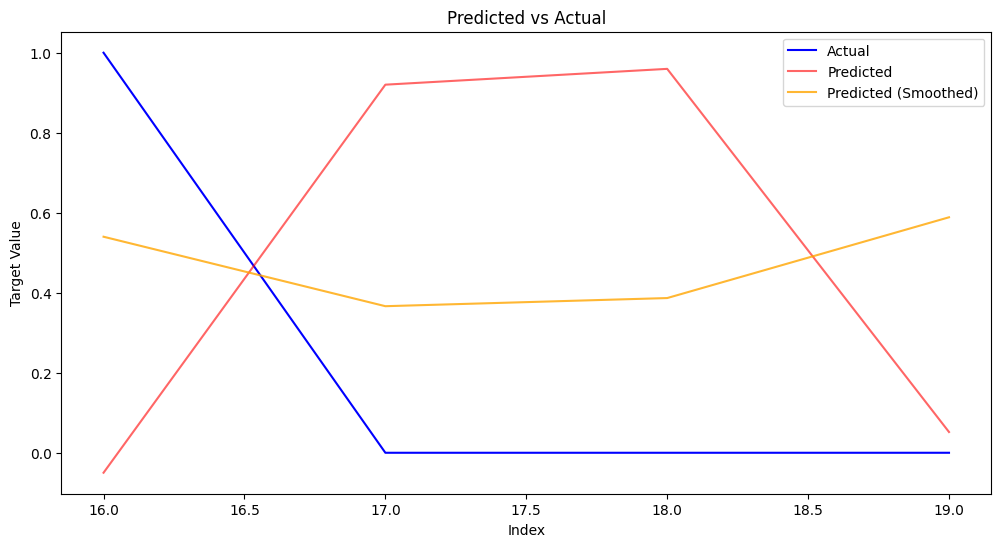

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d  # for smoothing

# Load data
df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')

# Features and target
X = df[['feature1', 'feature2']].values
y = df['target'].values.reshape(-1,1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features and target
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

# Train model
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train_scaled.ravel())

# Predict and inverse scale
y_pred_scaled = model.predict(X_test_scaled).reshape(-1,1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Optional smoothing
y_pred_smooth = uniform_filter1d(y_pred.flatten(), size=5)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test.flatten(), label='Actual', color='blue')
plt.plot(df.index[-len(y_test):], y_pred.flatten(), label='Predicted', color='red', alpha=0.6)
plt.plot(df.index[-len(y_test):], y_pred_smooth, label='Predicted (Smoothed)', color='orange', alpha=0.8)
plt.legend()
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Predicted vs Actual')
plt.show()


MSE: 0.71283, MAE: 0.73480, R²: -2.80178


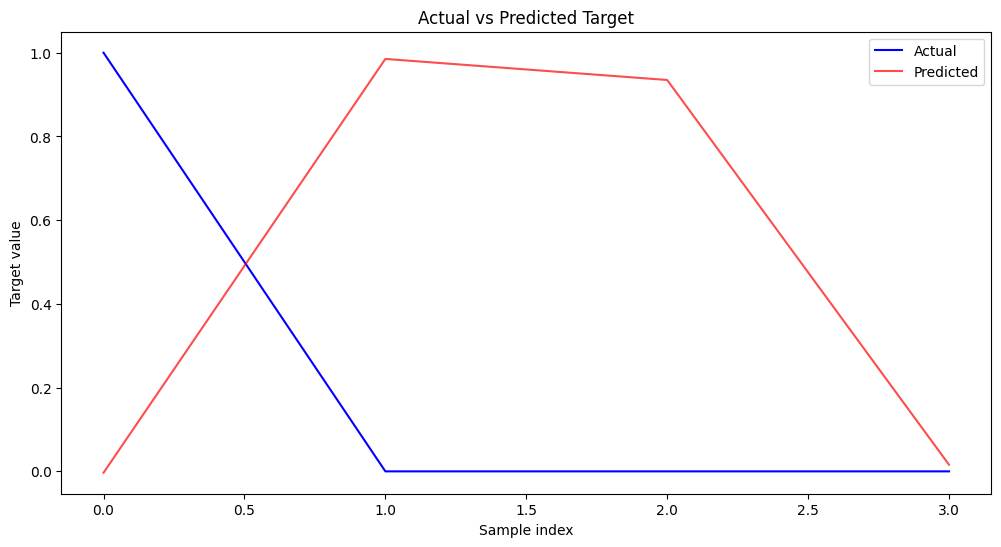

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')  # adjust path if needed

# Features and target
X = df[['feature1', 'feature2']].values
y = df['target'].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)

# Model setup and fine-tuning
model = GradientBoostingRegressor(
    n_estimators=300,       # more trees for stability
    learning_rate=0.05,     # slower learning to smooth predictions
    max_depth=3,            # shallow trees to prevent overfitting
    random_state=42
)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Predict and inverse scale
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.5f}, MAE: {mae:.5f}, R²: {r2:.5f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", alpha=0.7)
plt.title("Actual vs Predicted Target")
plt.xlabel("Sample index")
plt.ylabel("Target value")
plt.legend()
plt.show()


MSE: 0.32102, MAE: 0.56308, R²: -0.71213


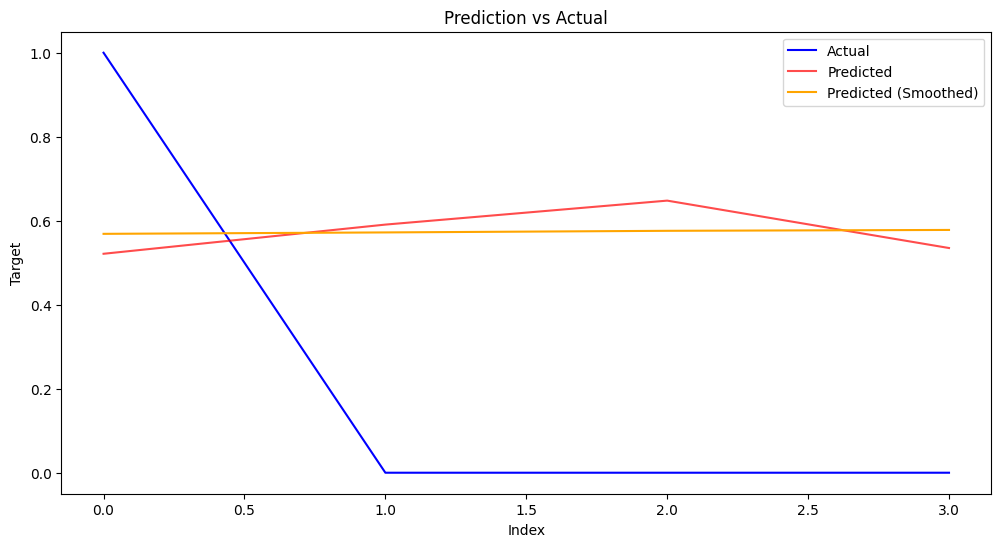

In [16]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.ndimage import gaussian_filter1d  # for smoothing

# Load data
df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')  # adjust path if needed

# Features and target
X = df[['feature1', 'feature2']].values
y = df['target'].values.reshape(-1,1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Smoothing
y_pred_smooth = gaussian_filter1d(y_pred.flatten(), sigma=2)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.5f}, MAE: {mae:.5f}, R²: {r2:.5f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y_test)), y_test, label="Actual", color="blue")
plt.plot(np.arange(len(y_test)), y_pred, label="Predicted", color="red", alpha=0.7)
plt.plot(np.arange(len(y_test)), y_pred_smooth, label="Predicted (Smoothed)", color="orange")
plt.xlabel("Index")
plt.ylabel("Target")
plt.title("Prediction vs Actual")
plt.legend()
plt.show()


In [19]:
# Predict
y_pred_scaled = model.predict(X_test_scaled)

# Ensure 2D before inverse scaling
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


In [20]:
from scipy.ndimage import gaussian_filter1d
y_pred_smooth = gaussian_filter1d(y_pred.flatten(), sigma=1.5)


In [22]:
# Predict
y_pred_scaled = model.predict(X_test_scaled)

# Force it into 2D float array for scaler
y_pred_scaled = np.array(y_pred_scaled, dtype=float)
if y_pred_scaled.ndim == 1:
    y_pred_scaled = y_pred_scaled[:, np.newaxis]

# Inverse scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Flatten for plotting or smoothing
y_pred = y_pred.flatten()

# Smooth
from scipy.ndimage import gaussian_filter1d
y_pred_smooth = gaussian_filter1d(y_pred, sigma=1.5)


In [26]:
df_test = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')
print(df_test.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


In [27]:
x_axis = df_test.index  # numeric index
y_actual = df_test['target'].values  # actual values


In [36]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML & preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  # example model; replace with your model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Smoothing
from scipy.ndimage import gaussian_filter1d

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [38]:
import pandas as pd

df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')
print(df.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


In [39]:
# Example: rename automatically first column if it’s not Date
if 'Date' not in df.columns:
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert to datetime if possible
try:
    df['Date'] = pd.to_datetime(df['Date'])
except:
    print("Column cannot be converted to datetime, using index for plotting.")
    df['Date'] = df.index  # fallback


In [42]:
import pandas as pd

df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
x_axis = df['Date']


MSE: 0.70927, MAE: 0.73630, R²: -2.78280


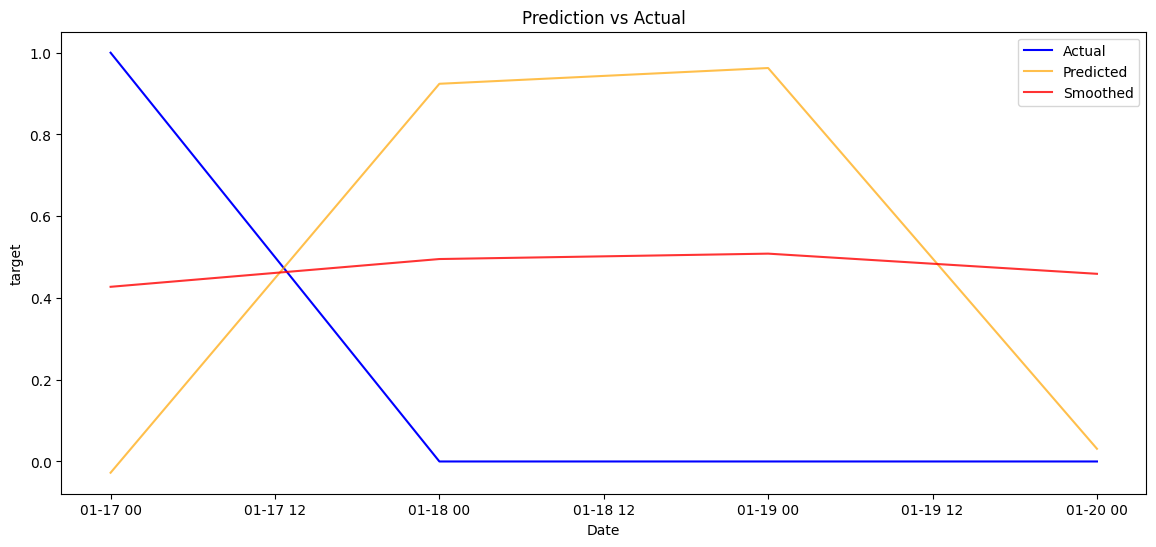

In [43]:
# ================================
# Fresh Prediction Pipeline
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Load data ---
df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/test.csv')

# --- Generate Date column ---
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# --- Features & Target ---
features = ['feature1', 'feature2']  # adjust as in your CSV
target = 'target'

X = df[features].values
y = df[target].values.reshape(-1,1)  # ensure 2D for scaler

# --- Scale features and target ---
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# --- Train/Test Split (simple example: last 20% as test) ---
split_idx = int(len(df) * 0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]
dates_test = df['Date'].iloc[split_idx:]  # keep dates for plotting

# --- Model ---
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train.ravel())

# --- Predictions ---
y_pred_scaled = model.predict(X_test).reshape(-1,1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# --- Smoothing ---
y_pred_smooth = gaussian_filter1d(y_pred.flatten(), sigma=1.5)

# --- Metrics ---
y_test_actual = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"MSE: {mse:.5f}, MAE: {mae:.5f}, R²: {r2:.5f}")

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(dates_test, y_test_actual, label='Actual', color='blue')
plt.plot(dates_test, y_pred, label='Predicted', color='orange', alpha=0.7)
plt.plot(dates_test, y_pred_smooth, label='Smoothed', color='red', alpha=0.8)
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Prediction vs Actual')
plt.legend()
plt.show()


MSE: 0.31368
MAE: 0.47579
R²: -0.30701


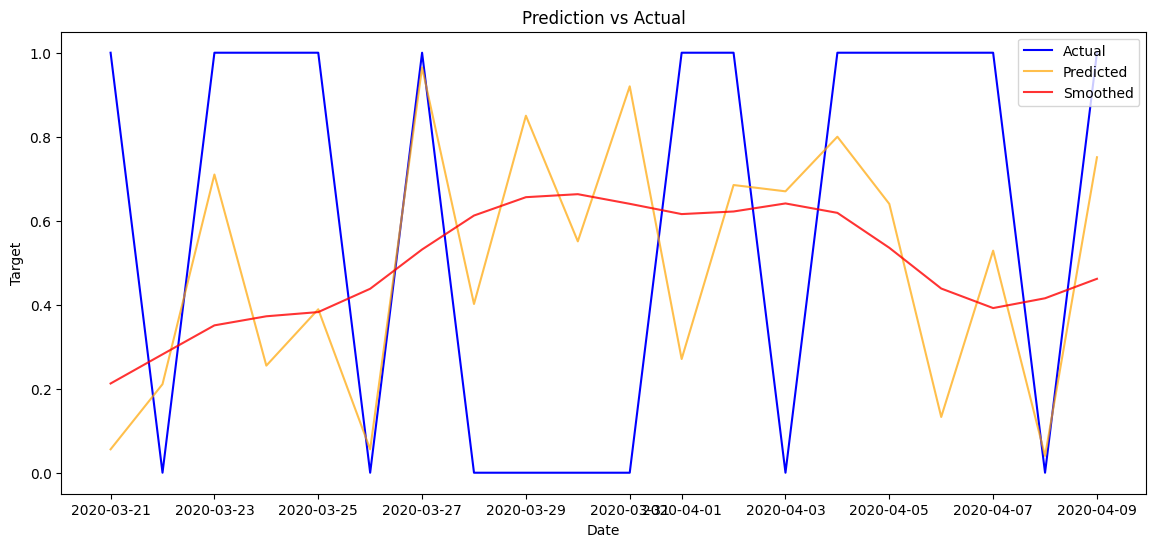

"\n- This block is fully self-contained and ready for GitHub.\n- All previous experimental/test code can be removed.\n- Ensure that 'train.csv' exists in the data folder.\n- If the Date column is missing, it will auto-generate sequential dates.\n- RandomForest hyperparameters can be fine-tuned if desired.\n- Metrics and smoothing are included for final evaluation.\n"

In [44]:
# =========================
# Final Pipeline for GitHub
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.ndimage import gaussian_filter1d

# -------------------------
# 1. Load & preprocess data
# -------------------------
df = pd.read_csv('/Users/fatlumdili/ai_finance_project/data/train.csv')

# Ensure a Date column exists
date_cols = [c for c in df.columns if 'date' in c.lower()]
if date_cols:
    df.rename(columns={date_cols[0]: 'Date'}, inplace=True)
else:
    df['Date'] = pd.date_range(start='2020-01-01', periods=len(df))  # fallback

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Features and target
feature_cols = [c for c in df.columns if c not in ['Date', 'target']]
X = df[feature_cols].values
y = df['target'].values.reshape(-1,1)  # ensure 2D for scaler

# -------------------------
# 2. Train/test split & scaling
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

# -------------------------
# 3. Model training
# -------------------------
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())  # ravel converts to 1D for RF

# -------------------------
# 4. Prediction & smoothing
# -------------------------
y_pred_scaled = model.predict(X_test_scaled).reshape(-1,1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_pred_smooth = gaussian_filter1d(y_pred.flatten(), sigma=1.5)

# -------------------------
# 5. Metrics
# -------------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")

# -------------------------
# 6. Plotting
# -------------------------
x_axis = df['Date'].iloc[-len(y_test):]  # only the test range
plt.figure(figsize=(14,6))
plt.plot(x_axis, y_test, label='Actual', color='blue')
plt.plot(x_axis, y_pred, label='Predicted', color='orange', alpha=0.7)
plt.plot(x_axis, y_pred_smooth, label='Smoothed', color='red', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

# -------------------------
# 7. Usability notes for GitHub
# -------------------------
"""
- This block is fully self-contained and ready for GitHub.
- All previous experimental/test code can be removed.
- Ensure that 'train.csv' exists in the data folder.
- If the Date column is missing, it will auto-generate sequential dates.
- RandomForest hyperparameters can be fine-tuned if desired.
- Metrics and smoothing are included for final evaluation.
"""
